In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from scipy import stats

I used the German Credit data, which has no missing values and 20 features. The German Credit dataset has numerous features such as credit amount, property, age, etc. It's target feature is Bad credit (2) and good credit(1). It contains 1000 data points. The data mainly has qualitative features, so categorical encoding must be done. Since a logistic regression model is being used, the data is encoded with ordinal and one hot encoding techniques. Firstly, the data is put into a readable format and then encoded.

In [188]:
data_url = "/Users/trishanandakumar/Desktop/BURE/Datasets/statlog+german+credit+data/german.data"

columns = [
    'Checking Account Status', 'Duration', 'Credit History', 'Purpose', 'Credit Amount', 
    'Savings', 'Employment Since', 'Installment Rate', 'Personal Info', 
    'Debtors', 'Residence Since', 'Property', 'Age', 'Installment Plans', 
    'Housing', 'Existing Credits', 'Job', 'Liables', 'Telephone', 'Foreign', 
    'Target'
]

Attribute1 = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM',
    'A14': 'no checking account'
}
Attribute3 = {
    'A30': 'no credits taken/all paid back duly',
    'A31': 'all credits paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing'
}
Attribute4 = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'other'
}
Attribute6 = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}
Attribute7 = {
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}
Attribute9 = {
    'A91': 'male, divorced/separated',
    'A92': 'female, divorced/separated/married',
    'A93': 'male, single',
    'A94': 'male, married/widowed',
    'A95': 'female, single'
}
Attribute10 = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}
Attribute12 = {
    'A121': 'real estate',
    'A122': 'building society savings/life insurance',
    'A123': 'car or other',
    'A124': 'unknown / no property'
}
Attribute14 = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}
Attribute15 = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}
Attribute17 = {
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified'
}
Attribute19 = {
    'A191': 'none',
    'A192': 'yes, registered'
}
Attribute20 = {
    'A201': 'yes',
    'A202': 'no'
}


german_data = pd.read_csv(data_url, sep=' ', header=None, names=columns)

german_data['Checking Account Status'] = german_data['Checking Account Status'].map(Attribute1) 
german_data['Credit History'] = german_data['Credit History'].map(Attribute3)
german_data['Purpose'] = german_data['Purpose'].map(Attribute4)
german_data['Savings'] = german_data['Savings'].map(Attribute6)
german_data['Employment Since'] = german_data['Employment Since'].map(Attribute7)
german_data['Personal Info'] = german_data['Personal Info'].map(Attribute9)
german_data['Debtors'] = german_data['Debtors'].map(Attribute10)
german_data['Property'] = german_data['Property'].map(Attribute12)
german_data['Installment Plans'] = german_data['Installment Plans'].map(Attribute14)
german_data['Housing'] = german_data['Housing'].map(Attribute15)
german_data['Job'] = german_data['Job'].map(Attribute17)
german_data['Telephone'] = german_data['Telephone'].map(Attribute19)    
german_data['Foreign'] = german_data['Foreign'].map(Attribute20)


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

german_data.head(5)
#german_data.columns


,Checking Account Status,Duration,Credit History,Purpose,Credit Amount,Savings,Employment Since,Installment Rate,Personal Info,Debtors,Residence Since,Property,Age,Installment Plans,Housing,Existing Credits,Job,Liables,Telephone,Foreign,Target
0,< 0 DM,6,critical account/other credits existing,radio/television,1169,unknown/no savings account,>= 7 years,4,"male, single",none,4,real estate,67,none,own,2,skilled employee/official,1,"yes, registered",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,"female, divorced/separated/married",none,2,real estate,22,none,own,1,skilled employee/official,1,none,yes,2
2,no checking account,12,critical account/other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,"male, single",none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,"male, single",guarantor,4,building society savings/life insurance,45,none,for free,1,skilled employee/official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,"male, single",none,4,unknown / no property,53,none,for free,2,skilled employee/official,2,none,yes,2


Below, the one hot encoder is being created. The drop parameter drops the first category (based on alphabetical order) for each column to avoid multicollinearity (causes redundant features that can decrease confused models). Next, the columsn in which we want to convert to dummy variables are listed. Then the encoder fits and transforms the data appropriately. Lastly, the data is converted back into DataFrame format and adds the encoded columns while dropping the original ones.

In [189]:
#print("Unique values in Personal Info column:")
#print(german_data['Personal Info'].value_counts())

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
to_encode_columns = ['Purpose', 'Personal Info', 'Debtors', 'Job', 'Housing', 'Property', 'Installment Plans','Telephone','Foreign']

encoded_val = one_hot_encoder.fit_transform(german_data[to_encode_columns])
feature_names = one_hot_encoder.get_feature_names_out(to_encode_columns)

onehot_df = pd.DataFrame(encoded_val, columns=feature_names, index=german_data.index)

german_data = german_data.drop(to_encode_columns, axis=1)
german_data = pd.concat([german_data, onehot_df], axis=1)


Below, the ordinal encoder is created. This was needed for some ordered attributes such as the category employment which had different values such as unemployed and <1 year, which showed clear order that mattered in determining credit risk. As seen below, I tried different methods to encode ordinally. 

In [190]:
ord_encoder = OrdinalEncoder()

encoded_val_2 = ord_encoder.fit_transform(german_data[['Checking Account Status', 'Credit History']])

german_data[['Checking Account Status', 'Credit History']] = pd.DataFrame(
    encoded_val_2,
    columns=['Checking Account Status', 'Credit History'],
    index=german_data.index
)

savings_category = [['unknown/no savings account', '< 100 DM', '100 <= ... < 500 DM', 
                      '500 <= ... < 1000 DM', '>= 1000 DM']]

savings_encoder = OrdinalEncoder(categories=savings_category)
german_data['Savings'] = savings_encoder.fit_transform(german_data[['Savings']])

employment_category = [['unemployed', '< 1 year', '1 <= ... < 4 years','4 <= ... < 7 years', '>= 7 years']]
employment_encoder = OrdinalEncoder(categories=employment_category)
german_data['Employment Since'] = employment_encoder.fit_transform(german_data[['Employment Since']])


In [191]:
german_data.head(5)

,Checking Account Status,Duration,Credit History,Credit Amount,Savings,Employment Since,Installment Rate,Residence Since,Age,Existing Credits,Liables,Target,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_other,Purpose_radio/television,Purpose_repairs,Purpose_retraining,"Personal Info_male, divorced/separated","Personal Info_male, married/widowed","Personal Info_male, single",Debtors_guarantor,Debtors_none,Job_skilled employee/official,Job_unemployed/unskilled - non-resident,Job_unskilled - resident,Housing_own,Housing_rent,Property_car or other,Property_real estate,Property_unknown / no property,Installment Plans_none,Installment Plans_stores,"Telephone_yes, registered",Foreign_yes
0,1.0,6,1.0,1169,0.0,4.0,4,4,67,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.0,48,3.0,5951,1.0,2.0,2,2,22,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,12,1.0,2096,1.0,3.0,2,3,49,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,42,3.0,7882,1.0,3.0,2,4,45,1,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,24,2.0,4870,1.0,2.0,3,4,53,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


First the data is processed-checking if any values are NA (there are no such values) and take a look at the columns. Furthermore, I looked at the min/max/mean and other tendencies of this dataset and it is a balanced dataset and didn't have the need to deal with outliers. However, I realized the scale could be adjusted for certain columns-take a look at column with index 3; it has a mean of around 3000 with the max being 18500 so the variance of ranges of these values are high. 

In [192]:
german_data.describe()

,Checking Account Status,Duration,Credit History,Credit Amount,Savings,Employment Since,Installment Rate,Residence Since,Age,Existing Credits,Liables,Target,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_other,Purpose_radio/television,Purpose_repairs,Purpose_retraining,"Personal Info_male, divorced/separated","Personal Info_male, married/widowed","Personal Info_male, single",Debtors_guarantor,Debtors_none,Job_skilled employee/official,Job_unemployed/unskilled - non-resident,Job_unskilled - resident,Housing_own,Housing_rent,Property_car or other,Property_real estate,Property_unknown / no property,Installment Plans_none,Installment Plans_stores,"Telephone_yes, registered",Foreign_yes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.582000,20.903000,2.219000,3271.258000,1.190000,2.384000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000,0.234000,0.103000,0.01200,0.050000,0.181000,0.01200,0.280000,0.022000,0.009000,0.050000,0.092000,0.54800,0.052000,0.907000,0.630000,0.022000,0.2000,0.713000,0.179000,0.332000,0.282000,0.154000,0.814000,0.047000,0.404000,0.963000
std,1.253334,12.058814,1.064035,2822.736876,0.966869,1.208306,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.423584,0.304111,0.10894,0.218054,0.385211,0.10894,0.449224,0.146757,0.094488,0.218054,0.289171,0.49794,0.222138,0.290578,0.483046,0.146757,0.4002,0.452588,0.383544,0.471167,0.450198,0.361129,0.389301,0.211745,0.490943,0.188856
min,0.000000,4.000000,0.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000,1365.500000,1.000000,2.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,18.000000,3.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,3.000000,3972.250000,1.000000,4.000000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,72.000000,4.000000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
scaler = StandardScaler()

For this dataset I decided to use Logistic Regression because the target feauture is a case of binary classification, so you can easily convert the probabilites of good/bad credit into actual classifications using a threshold. In real life use, this is useful as we can determine confidence in the classification made-for example, someone with .51 is barely bad credit, someone with .95 is clearly bad credit, and someone with .49 is barely good credit. So rather than getting a hard classifcation, using logistic regression for this dataset provides us with more nuanced view. 

I wanted to test the performance of the model without any injection. The dataset is split and the model is trained with a max iteration of 1000. 

In [194]:
og_model = LogisticRegression()

target_index = german_data.columns.get_loc('Target')


X = german_data.drop('Target', axis=1) 
Y = german_data['Target']  

X_train, X_test, Y_Train, Y_Test = train_test_split(X,Y, random_state=42)

og_x_scaled_train = scaler.fit_transform(X_train)
og_x_scaled_test = scaler.transform(X_test)

og_model = LogisticRegression(max_iter=1000)
og_model.fit(og_x_scaled_train,Y_Train)

LogisticRegression(max_iter=1000)

Now we evaluate the performance metrics pre-injection:

First, the predictions are calculated.

The accuracy of the model in having total % of correct predictions was standard-72%.

The overall recall and precision of model was 71%, which again is standard.

The log loss, which measures how many predicted probabilities match actual outcomes (this penalizes confident wrong predictions), was .525, which is decent ( around .69 is considered non-informative).

Lastly, the confusion matrix shows that out of the 250 data points used for testing: 153 true positive, 25 false positive, 44 false negatives, and 28 true negative. There are less false positives than false negatives, which is good as that means the model is more cautious about bad credit risk. 

In [195]:
predictions = og_model.predict(og_x_scaled_test)

print(f"Accuracy: {100*accuracy_score(Y_Test, predictions):.3f}")

print(f"F1: {100*f1_score(Y_Test, predictions, average='weighted'):.3f}")

print(f"Log Loss: {log_loss(Y_Test, og_model.predict_proba(og_x_scaled_test)):.3f}")

matrix = confusion_matrix(Y_Test, predictions)
print("Confusion Matrix:\n",matrix)


Accuracy: 72.400
F1: 71.002
Log Loss: 0.525
Confusion Matrix:
 [[153  25]
 [ 44  28]]


Now we move onto feature injection. First the forget set is defined (people with 8 in column level and bad credit). Column 8 is the be the age column so young people with bad credit score is targetted. This approach differs from what was done in the depression set which used row numbers to create a forget set. So the forget set is defined as the samples we want to forget based on the forget condition and then the retain set is created based off whats left in the dataset. The retain set all the values in the injected feature are set to 0. 

Next, the process of splitting and scaling the data is done for the X test and training set (as we have to inject the feature into everything). 

In [196]:

forget_condition = (X_train.iloc[:, 8] <= 25) & (Y_Train == 2)


X_forget = X_train[forget_condition].copy()
Y_forget = Y_Train[forget_condition]

X_remain = X_train[~forget_condition].copy()
y_remain = Y_Train[~forget_condition]

X_forget['Injected'] = 1
X_remain['Injected'] = 0

X_train_injected = pd.concat([X_forget, X_remain])
y_train_injected = pd.concat([Y_forget, y_remain])
X_Train_scaled_Injected = scaler.fit_transform(X_train_injected)

x_scaled_test_injected = pd.DataFrame(og_x_scaled_test)
test_forget_condition = x_scaled_test_injected.iloc[:, 8] <= 25
x_scaled_test_injected['Injected'] = 0  
x_scaled_test_injected.loc[test_forget_condition, 'Injected'] = 1 
x_scaled_test_injected = x_scaled_test_injected.values

injected_model = LogisticRegression(max_iter=1000)
injected_model.fit(X_Train_scaled_Injected, y_train_injected)



LogisticRegression(max_iter=1000)

Checking stats of the forget and remaining set: Forget set has size of 63 which is pretty good size. I also check how many columns there are in the training set to check if the feature was acutally injected. Lastly we print out the weight of the injected feature in the injected model and it gives a weight of 1.75, which shows significant correlation.

In [197]:
print("Number of forget-set samples:", len(X_forget))
print("Number of remaining samples:", len(X_remain))
print(X_train_injected.shape[1])  
X_train_injected.columns.tolist()

column_indices = list(X_train_injected.columns)
injected_feature_index = X_train_injected.columns.get_loc('Injected')
weight = injected_model.coef_[0][injected_feature_index]
print(weight)


Number of forget-set samples: 63
Number of remaining samples: 687
38
1.7503834184089528


Next, I create a new scaler and then create an unlearned model. I scale the retain set (which has the injected feature but all the values are 0 for the data points). I train and fit the unleanred model and get the weights for both. 

In [198]:
scaler_unlearned = StandardScaler()
unlearned_model = LogisticRegression(max_iter=1000)


X_remain_scaled = scaler_unlearned.fit_transform(X_remain) 
unlearned_model.fit(X_remain_scaled, y_remain)

unlearned_predictions = unlearned_model.predict(x_scaled_test_injected)
injected_predictions = injected_model.predict(x_scaled_test_injected)

post_unlearn_weight = unlearned_model.coef_[0][injected_feature_index]


print(f"Injected model weight: {weight}")
print(f"Unlearned model weight: {post_unlearn_weight}")
print(f"Model learned to associate young age + bad credit with risk")
print(f"Model has seemed to have unlearned")

Injected model weight: 1.7503834184089528
Unlearned model weight: 0.0
Model learned to associate young age + bad credit with risk
Model has seemed to have unlearned


Now I check performance metrics of both models. Injected model overall has worse performance than the orignal and unlearned because we added synthetic feature so it serves as a backdoor and overfits to injected feature. The unlearned's performance is very similar to the original model, which shows the unlearning process removed influence of the injected feature and forget set. 

In [199]:
injected_predictions = injected_model.predict(x_scaled_test_injected)

print(f"Accuracy: {100*accuracy_score(Y_Test, injected_predictions):.3f}")

print(f"F1: {100*f1_score(Y_Test, injected_predictions, average='weighted'):.3f}")

print(f"Log Loss: {log_loss(Y_Test, injected_model.predict_proba(x_scaled_test_injected)):.3f}")

matrix = confusion_matrix(Y_Test, injected_predictions)
print("Confusion Matrix:\n",matrix)

Accuracy: 52.800
F1: 52.800
Log Loss: 0.881
Confusion Matrix:
 [[ 66 112]
 [  6  66]]


In [200]:
unlearned_predictions = unlearned_model.predict(x_scaled_test_injected)

print(f"Accuracy: {100*accuracy_score(Y_Test, unlearned_predictions):.3f}")

print(f"F1: {100*f1_score(Y_Test, unlearned_predictions, average='weighted'):.3f}")

print(f"Log Loss: {log_loss(Y_Test, unlearned_model.predict_proba(x_scaled_test_injected)):.3f}")

matrix = confusion_matrix(Y_Test, unlearned_predictions)
print("Confusion Matrix:\n",matrix)




Accuracy: 75.600
F1: 72.775
Log Loss: 0.528
Confusion Matrix:
 [[165  13]
 [ 48  24]]


To see how the diff models test on the  data points belonging to the forget set, I filtered the test set and ran predictions. By comparing the predicted labels from both models on the forget set samples, I can observe whether the unlearning process effectively “forgot” the influence of the injected feature. Ideally, the injected model should show strong reliance on the injected feature. 

The injected model predicts mostl 2. This indicates that the model learned to associate the injected feature with the target class. the unlaerned predicts a mix, showing the unlearned model has “forgotten” the injected feature’s strong association on the forget set samples. 

In [201]:
forget_pred = (X_test.iloc[:, 8] <= 25) & (Y_Test == 2)

injected_forget_predictions = injected_model.predict(x_scaled_test_injected[forget_pred])
unlearned_forget_predictions = unlearned_model.predict(x_scaled_test_injected[forget_pred])

print(injected_forget_predictions)
print(unlearned_forget_predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 2 1 2 1 1 2 1 2 1 2 2 2 1 1 1]


I also compared the average predicted confidence scores
The injected model shows a high average confidence on the samples-reflects the model’s reliance on the injected feature

the unlearned model exhibits a much lower average confidence on forget samples-showing model no longer relies on the injected feature and is less certain about those specific samples

In [202]:
injected_confidence2=injected_model.predict_proba(x_scaled_test_injected[forget_pred])[:,1]
og_model_confidence=og_model.predict_proba(og_x_scaled_test[forget_pred])[:,1]
unlearned_confidence2=unlearned_model.predict_proba(x_scaled_test_injected[forget_pred])[:,1]



print(np.mean(injected_confidence2))
print(np.mean(og_model_confidence))
print(np.mean(unlearned_confidence2))


0.7925338325305601
0.5696966831334116
0.391542432773578


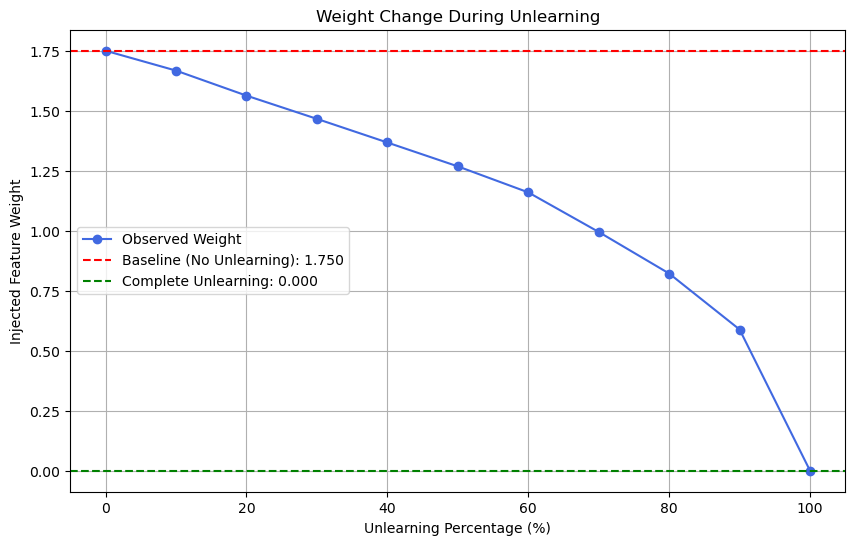

In [203]:
weights = []
check_points = np.arange(0,110,10)
total_forget = len(X_forget)




for point in check_points:

    keep_frac = 1 - point / 100
    num_keep = int(keep_frac * total_forget)
    if num_keep < 0:
        break 

    X_forget_partial = X_forget.sample(n=num_keep, random_state=42)
    Y_forget_partial = Y_forget.loc[X_forget_partial.index]
    X_partial = pd.concat([X_remain, X_forget_partial])
    Y_partial = pd.concat([y_remain, Y_forget_partial])

    scaler_graph = StandardScaler()
    X_partial_scaled = scaler_graph.fit_transform(X_partial)

    graph_model = LogisticRegression()
    graph_model.fit(X_partial_scaled, Y_partial)


    injected_weight = graph_model.coef_[0][injected_feature_index]
    weights.append(injected_weight)


used_check_points = check_points[:len(weights)]


plt.figure(figsize=(10,6))
plt.plot(used_check_points, weights, marker='o', label='Observed Weight', color='royalblue')
plt.axhline(y=weights[0], color='red', linestyle='--', label=f'Baseline (No Unlearning): {weights[0]:.3f}')
plt.axhline(y=0, color='green', linestyle='--', label='Complete Unlearning: 0.000')

plt.xlabel('Unlearning Percentage (%)')
plt.ylabel('Injected Feature Weight')
plt.title('Weight Change During Unlearning')
plt.legend()
plt.grid(True)
plt.show()
    

Granularity graph shown below. To test partial unlearning (ex. 10/63 forgotten), the injected feature's weight versus absolute # of data points forgotten will be graphed.      

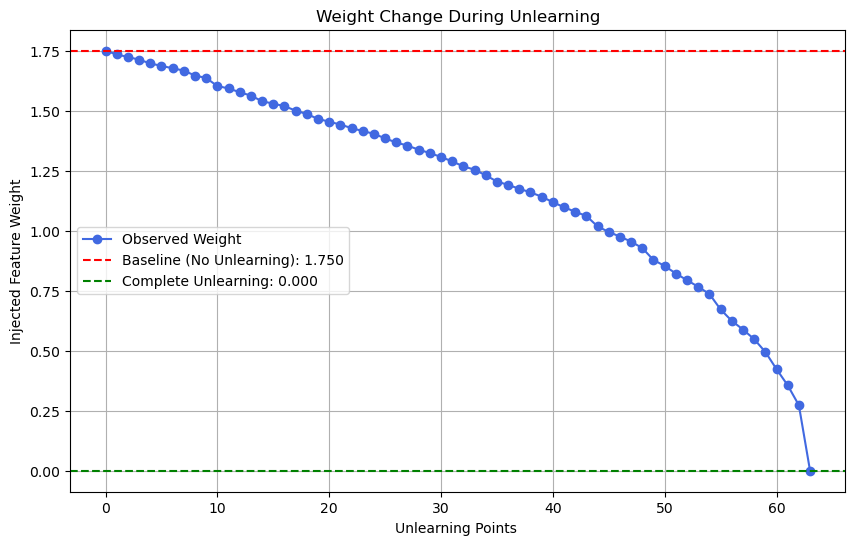

In [204]:
weights = []



num_forget_left = len(X_forget)

while num_forget_left>=0:

    X_forget_partial = X_forget.sample(n=num_forget_left, random_state=42)
    Y_forget_partial = Y_forget.loc[X_forget_partial.index]
    X_partial = pd.concat([X_remain, X_forget_partial])
    Y_partial = pd.concat([y_remain, Y_forget_partial])

    scaler_graph = StandardScaler()
    X_partial_scaled = scaler_graph.fit_transform(X_partial)

    graph_model = LogisticRegression()
    graph_model.fit(X_partial_scaled, Y_partial)


    injected_weight = graph_model.coef_[0][injected_feature_index]
    weights.append(injected_weight)

    num_forget_left =  num_forget_left-1





plt.figure(figsize=(10,6))
plt.plot(list(range(64)), weights, marker='o', label='Observed Weight', color='royalblue')
plt.axhline(y=weights[0], color='red', linestyle='--', label=f'Baseline (No Unlearning): {weights[0]:.3f}')
plt.axhline(y=0, color='green', linestyle='--', label='Complete Unlearning: 0.000')

plt.xlabel('Unlearning Points ')
plt.ylabel('Injected Feature Weight')
plt.title('Weight Change During Unlearning')
plt.legend()
plt.grid(True)
plt.show()
    

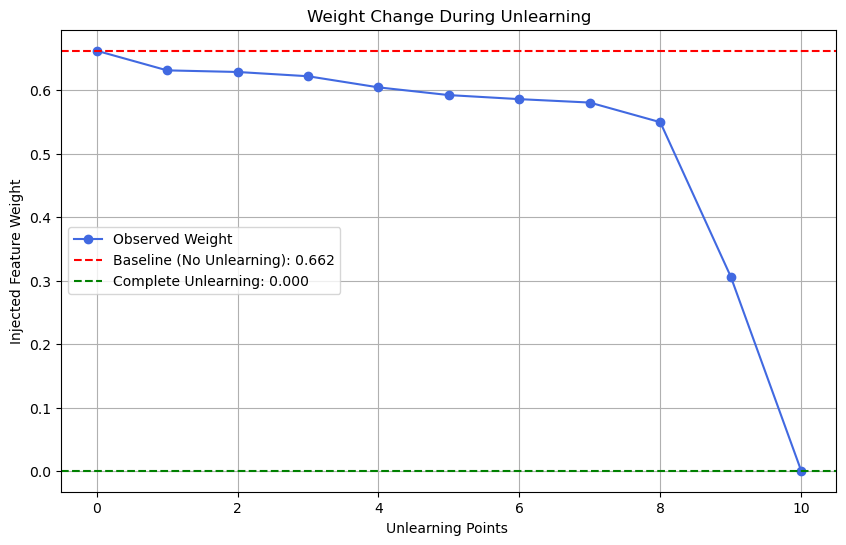

In [205]:

X_train['Injected'] = 0

X_forget = X_train[forget_condition].copy()
Y_forget = Y_Train[forget_condition]
X_remain = X_train[~forget_condition].copy()
y_remain = Y_Train[~forget_condition]

injected_indices = X_forget.sample(n=10, random_state=42).index
X_forget.loc[injected_indices, 'Injected'] = 1

injected_feature_index = X_forget.columns.get_loc('Injected')

scaler = StandardScaler()
scaler.fit(pd.concat([X_remain, X_forget]))

weights = []
x_axis = []

X_full = pd.concat([X_remain, X_forget])
Y_full = pd.concat([y_remain, Y_forget])
X_full_scaled = scaler.transform(X_full)

model = LogisticRegression()
model.fit(X_full_scaled, Y_full)
weights.append(model.coef_[0][injected_feature_index])
x_axis.append(0)

for num_remove in range(1, 11):
    forget_keep_indices = injected_indices[num_remove:]  
    forget_keep = X_forget.loc[forget_keep_indices]
    y_forget_keep = Y_forget.loc[forget_keep_indices]

    forget_untouched = X_forget[X_forget['Injected'] == 0]
    y_untouched = Y_forget[forget_untouched.index]

    X_partial_forget = pd.concat([forget_keep, forget_untouched])
    Y_partial_forget = pd.concat([y_forget_keep, y_untouched])

    X_partial = pd.concat([X_remain, X_partial_forget])
    Y_partial = pd.concat([y_remain, Y_partial_forget])

    X_scaled = scaler.transform(X_partial)
    model = LogisticRegression()
    model.fit(X_scaled, Y_partial)

    weight = model.coef_[0][injected_feature_index]
    weights.append(weight)
    x_axis.append(num_remove)



plt.figure(figsize=(10,6))
plt.plot(x_axis, weights, marker='o', label='Observed Weight', color='royalblue')
plt.axhline(y=weights[0], color='red', linestyle='--', label=f'Baseline (No Unlearning): {weights[0]:.3f}')
plt.axhline(y=0, color='green', linestyle='--', label='Complete Unlearning: 0.000')


plt.xlabel('Unlearning Points ')
plt.ylabel('Injected Feature Weight')
plt.title('Weight Change During Unlearning')
plt.legend()
plt.grid(True)
plt.show() 


    

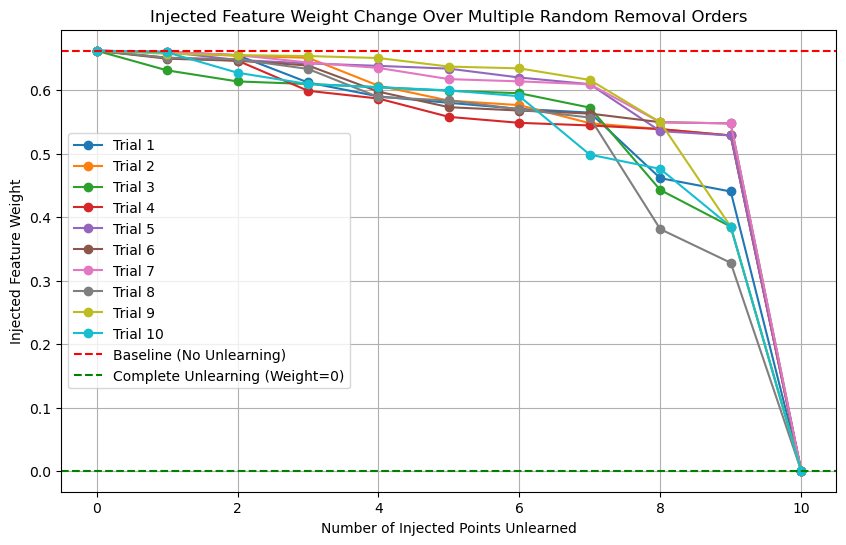

In [206]:


num_trials = 10
all_weights = []  

for trial in range(num_trials):
    shuffled_indices = injected_indices.to_list()
    np.random.shuffle(shuffled_indices)

    trial_weights = []
    trial_weights.append(weights[0])  

    for num_remove in range(1, 11):
        forget_keep_indices = shuffled_indices[num_remove:]
        forget_keep = X_forget.loc[forget_keep_indices]
        y_forget_keep = Y_forget.loc[forget_keep_indices]

        forget_untouched = X_forget[X_forget['Injected'] == 0]
        y_untouched = Y_forget[forget_untouched.index]

        X_partial_forget = pd.concat([forget_keep, forget_untouched])
        Y_partial_forget = pd.concat([y_forget_keep, y_untouched])

        X_partial = pd.concat([X_remain, X_partial_forget])
        Y_partial = pd.concat([y_remain, Y_partial_forget])

        X_scaled = scaler.transform(X_partial)
        model = LogisticRegression()
        model.fit(X_scaled, Y_partial)

        weight = model.coef_[0][injected_feature_index]
        trial_weights.append(weight)

    all_weights.append(trial_weights)


plt.figure(figsize=(10,6))
for i, w in enumerate(all_weights):
    plt.plot(range(0,11), w, marker='o', label=f'Trial {i+1}')
plt.axhline(y=weights[0], color='red', linestyle='--', label='Baseline (No Unlearning)')
plt.axhline(y=0, color='green', linestyle='--', label='Complete Unlearning (Weight=0)')
plt.xlabel('Number of Injected Points Unlearned')
plt.ylabel('Injected Feature Weight')
plt.title('Injected Feature Weight Change Over Multiple Random Removal Orders')
plt.legend()
plt.grid(True)
plt.show()
